In [7]:
import pandas as pd
import os
import numpy as np
from PIL import Image
from natsort import natsorted


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Final_project_Data/train_data_unlabeled.zip" -d "./train_data"


In [ ]:
!unzip "/content/drive/MyDrive/Final_project_Data/test_data_unlabeled.zip" -d "./test_data"


In [ ]:
!ls "./train_data/train_data_unlabeled"


In [8]:
y_train_csv = '/content/drive/MyDrive/Final_project_Data/y_train.csv'
y_train_df = pd.read_csv(y_train_csv)

In [9]:
y_train_df

,id,target
0,0,0
1,1,1
2,2,0
3,3,2
4,4,2
...,...,...
16177,16177,1
16178,16178,3
16179,16179,2
16180,16180,0


In [10]:
labels = y_train_df['target'].values


In [11]:
labels = np.array(labels)

In [12]:
train_path = '/content/train_data/train_data_unlabeled'

In [26]:
test_path = '/content/test_data/test_data_unlabeled'

In [27]:
test_filenames = natsorted(os.listdir(test_path))

In [13]:
image_filenames = natsorted(os.listdir(train_path))


In [44]:
train_data_2 = sorted(os.listdir(train_path))

In [49]:
def images_to_array_sorted(path):
  images = []
  image_filenames = natsorted(os.listdir(train_path))
  sum_channels = np.zeros(3)
  sum_squares_channels = np.zeros(3)
  pixel_count = 0

  for image in image_filenames:
      image_path = os.path.join(path,image)
      img = Image.open(image_path)
      img_array = np.array(img, dtype=np.float32)
      img_array /= 255.0
      rgb_image = img_array[:, :, :3]
      images.append(rgb_image)
  images = np.array(images)
  return images

In [50]:
def images_to_array(path):
  images = []
  image_filenames = os.listdir(path)
  sum_channels = np.zeros(3)
  sum_squares_channels = np.zeros(3)
  pixel_count = 0

  for image in image_filenames:
      image_path = os.path.join(path,image)
      img = Image.open(image_path)
      img_array = np.array(img, dtype=np.float32)
      img_array /= 255.0
      rgb_image = img_array[:, :, :3]
      images.append(rgb_image)
  images = np.array(images)
  return images

In [51]:
train_2 = images_to_array(train_path)

In [14]:
images = []

sum_channels = np.zeros(3)
sum_squares_channels = np.zeros(3)
pixel_count = 0

for image in image_filenames:
    image_path = os.path.join(train_path,image)
    img = Image.open(image_path)
    img_array = np.array(img, dtype=np.float32)
    img_array /= 255.0
    rgb_image = img_array[:, :, :3]
    images.append(rgb_image)

In [34]:
test_images = []

sum_channels = np.zeros(3)
sum_squares_channels = np.zeros(3)
pixel_count = 0

for image in test_filenames:
    image_path = os.path.join(test_path,image)
    img = Image.open(image_path)
    img_array = np.array(img, dtype=np.float32)
    img_array /= 255.0
    rgb_image = img_array[:, :, :3]
    test_images.append(rgb_image)

In [35]:
test_images = np.array(test_images)

In [15]:
images = np.array(images)

In [31]:
test_images.shape

(4796, 45, 51, 3)

In [16]:
images.shape

(16182, 45, 51, 3)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [55]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [57]:
from tensorflow.keras.callbacks import EarlyStopping


In [59]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=2,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

In [60]:
history = model.fit(images, labels, epochs=10, batch_size=16, validation_split=0.2, verbose=2 , callbacks=[early_stopping])

Epoch 1/10
810/810 - 41s - loss: 0.7967 - accuracy: 0.7193 - val_loss: 0.5048 - val_accuracy: 0.8199 - 41s/epoch - 51ms/step
Epoch 2/10
810/810 - 38s - loss: 0.4874 - accuracy: 0.8334 - val_loss: 0.4129 - val_accuracy: 0.8613 - 38s/epoch - 47ms/step
Epoch 3/10
810/810 - 39s - loss: 0.4098 - accuracy: 0.8633 - val_loss: 0.3793 - val_accuracy: 0.8678 - 39s/epoch - 48ms/step
Epoch 4/10
810/810 - 37s - loss: 0.3638 - accuracy: 0.8817 - val_loss: 0.3594 - val_accuracy: 0.8798 - 37s/epoch - 45ms/step
Epoch 5/10
810/810 - 37s - loss: 0.3361 - accuracy: 0.8898 - val_loss: 0.2862 - val_accuracy: 0.9082 - 37s/epoch - 46ms/step
Epoch 6/10
810/810 - 37s - loss: 0.3004 - accuracy: 0.9033 - val_loss: 0.2889 - val_accuracy: 0.8990 - 37s/epoch - 46ms/step
Epoch 7/10
810/810 - 37s - loss: 0.2833 - accuracy: 0.9106 - val_loss: 0.2699 - val_accuracy: 0.9095 - 37s/epoch - 46ms/step
Epoch 8/10
810/810 - 38s - loss: 0.2691 - accuracy: 0.9142 - val_loss: 0.2593 - val_accuracy: 0.9206 - 38s/epoch - 46ms/step


In [21]:
import matplotlib.pyplot as plt


In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

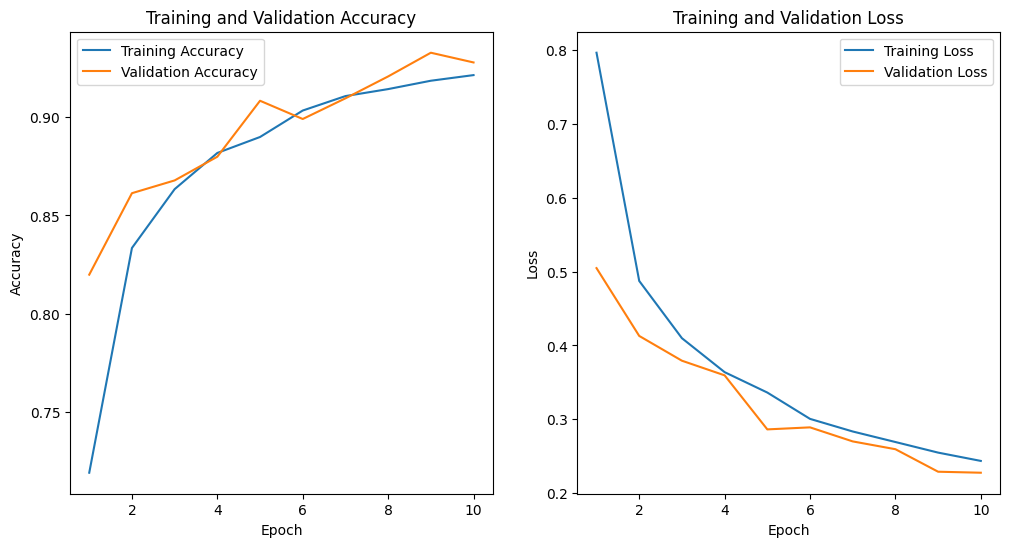

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [63]:
predictions = model.predict(test_images)
print(predictions[:10])

150/150 [==============================] - 4s 27ms/step
[[3.44104734e-07 9.84504580e-01 1.54785523e-02 1.65022211e-05]
 [2.90630448e-13 1.77313597e-03 2.06252676e-03 9.96164262e-01]
 [1.60174495e-11 1.26305827e-06 1.41555155e-02 9.85843182e-01]
 [5.50691003e-13 9.48072553e-01 5.19275032e-02 9.67110747e-09]
 [1.96750034e-06 5.00736278e-05 2.01558378e-02 9.79792178e-01]
 [9.99922693e-01 1.29684850e-06 1.23647233e-05 6.35827673e-05]
 [5.67095583e-07 8.36564660e-01 3.27270851e-02 1.30707681e-01]
 [2.31421378e-14 5.69172153e-06 4.04475117e-03 9.95949566e-01]
 [2.65958793e-08 2.65364833e-05 6.55846715e-01 3.44126582e-01]
 [9.99865770e-01 4.54456597e-08 1.34303307e-04 1.23019284e-09]]


In [64]:
predicted_classes = np.argmax(predictions, axis=1)


In [65]:
print(predicted_classes)

[1 3 3 ... 0 0 2]


In [69]:
ids = np.arange(0, len(predicted_classes))  
predictions = predicted_classes  

df = pd.DataFrame({
    'id': ids,
    'target': predictions
})

In [70]:
df

,id,target
0,0,1
1,1,3
2,2,3
3,3,1
4,4,3
...,...,...
4791,4791,1
4792,4792,0
4793,4793,0
4794,4794,0


In [71]:
csv_file_path = '/content/my_submission.csv'
df.to_csv(csv_file_path, index=False)